In [81]:
import torch
import torch.nn as nn
from torchvision import models
import numpy as np

from collections import OrderedDict
from torch.autograd import Variable

import cv2
import skimage.io
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (15, 15)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap


# extract and visulize model features 

In [2]:
model = models.resnet152(pretrained=True)
print model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [42]:
print type(model.modules)
print type(model._modules)

<type 'instancemethod'>
<class 'collections.OrderedDict'>


In [35]:
print model._modules

OrderedDict([('conv1', Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)), ('bn1', BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)), ('relu', ReLU(inplace)), ('maxpool', MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)), ('layer1', Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [36]:
print model._modules['conv1']

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


In [39]:
print model._modules['layer1']

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_

In [45]:
print model.children()

<generator object children at 0x7fb337074af0>


### remoove fc layer

In [46]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [47]:
model.fc = Identity()

In [48]:
print model._modules

OrderedDict([('conv1', Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)), ('bn1', BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)), ('relu', ReLU(inplace)), ('maxpool', MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)), ('layer1', Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [ ]:
#

In [49]:
def to_torch(ndarray):
    if type(ndarray).__module__ == 'numpy':
        return torch.from_numpy(ndarray).float()
    elif not torch.is_tensor(ndarray):
        raise ValueError("Cannot convert {} to torch tensor"
                         .format(type(ndarray)))
    return ndarray

In [50]:
# squeeze 1st dim and convert to numpy
def to_numpy(tensor):
    return tensor.squeeze(0).numpy()

In [51]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n).
       Fig color ones is white, zero is black."""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [52]:
def extract_cnn_feature(model, inputs, modules=None):
    model.eval()
    inputs = torch.from_numpy(inputs).float()
    inputs = inputs.unsqueeze_(0)
#     print('inputs shape \t{} \t type {}'.format(inputs.shape, type(inputs)))
    inputs = Variable(inputs, volatile=True)
    if modules is None:
        outputs = model(inputs)
        outputs = outputs.data.cpu()
        return outputs
    # Register forward hook for each module
    outputs = OrderedDict()
    handles = []
    _modules = model._modules[modules]
    for m in _modules:
#         print(m)
        outputs[id(m)] = None
        def func(m, i, o): outputs[id(m)] = o.data.cpu()
        # Attach copy function to our selected layer
        handles.append(m.register_forward_hook(func))
    model(inputs)
    # Detach our copy function from the layer
    for h in handles:
#         print h
        h.remove()
    return list(outputs.values())

In [53]:
def feature_maps_sort(tensor):
    print('tensor size \t ', tensor.size())
    feature_maps = tensor.squeeze(0)
    stat_feature_maps = torch.sum(feature_maps.contiguous().view(feature_maps.size(0), -1), dim=1)
    sorted, idx = stat_feature_maps.sort(0, descending=True)   
    return feature_maps[idx].numpy()
    

In [65]:
inputs = cv2.imread('/media/jaden/DeepLearningCode/object_detection/Mask-RCNN/data/images/img5.jpg')
# inputs = cv2.resize(inputs, (224, 224))
inputs = inputs.transpose((2, 0, 1))
print('inputs', inputs.shape)

output = extract_cnn_feature(model, inputs, 'layer1')
print('output shape \t{} \t type {}'.format(len(output), type(output)))
print('output[0] shape \t{} \t type {}'.format(output[0].shape, type(output[0])))

('inputs', (3, 800, 1200))


/home/jay/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


output shape 	3 	 type <type 'list'>
output[0] shape 	torch.Size([1, 256, 200, 300]) 	 type <class 'torch.Tensor'>


### layer 1 neuron response (stride 4)

('tensor size \t ', torch.Size([1, 256, 200, 300]))


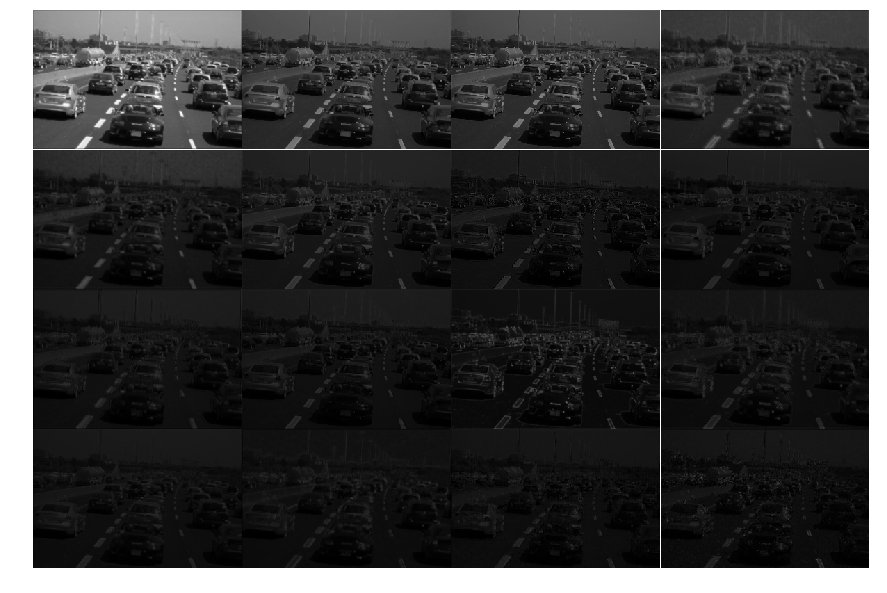

In [56]:
fmaps = feature_maps_sort(output[-1])
vis_square(fmaps[:16])

### layer 2  neuron response (stride 8)

/home/jay/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


output len 	8 	 shape torch.Size([1, 512, 100, 150])
('tensor size \t ', torch.Size([1, 512, 100, 150]))


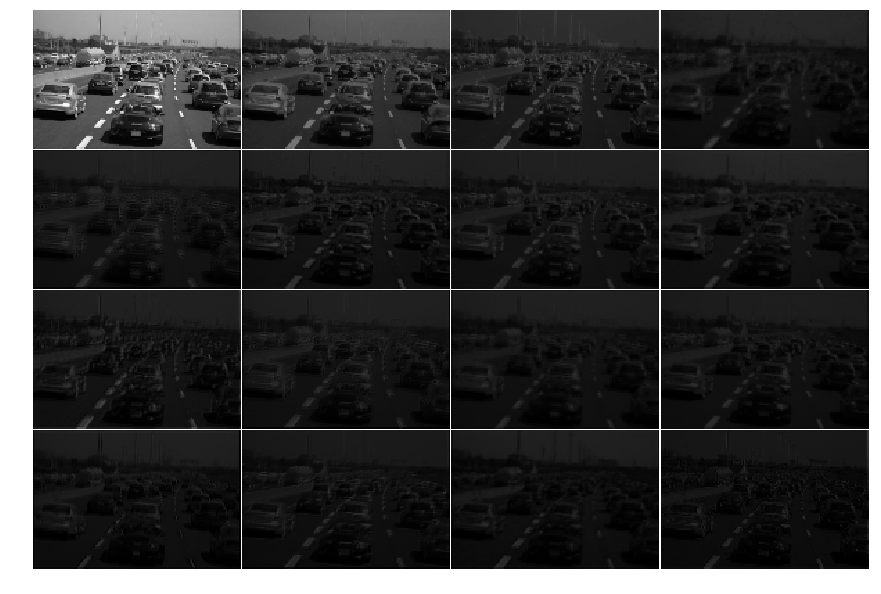

In [58]:
output2 = extract_cnn_feature(model, inputs, 'layer2')
print('output len \t{} \t shape {}'.format(len(output2), output2[-1].shape) )
fmaps = feature_maps_sort(output2[-1])
vis_square(fmaps[:16])

### layer 3 neuron response (stride 16)

/home/jay/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


output shape 	3 	 shape torch.Size([1, 1024, 50, 75])
('tensor size \t ', torch.Size([1, 1024, 50, 75]))


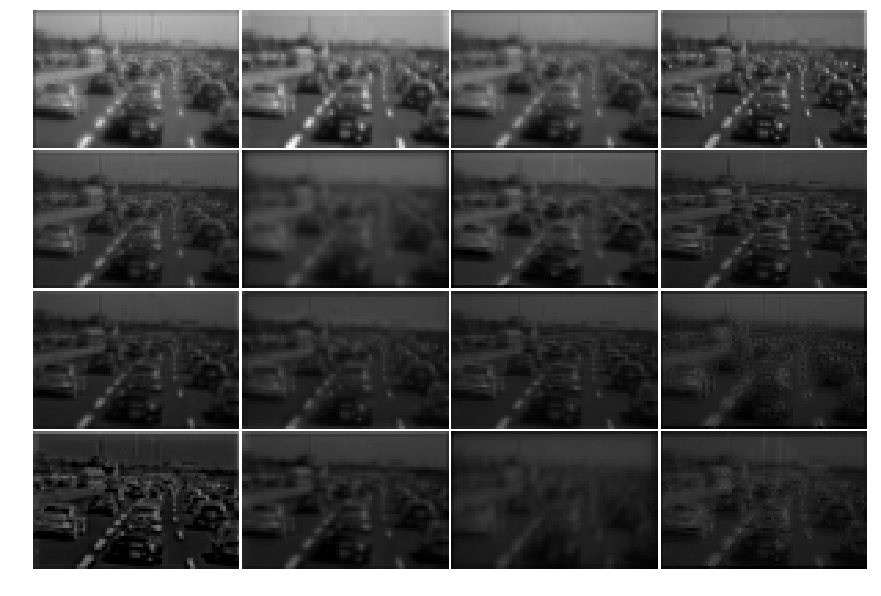

In [70]:
output3 = extract_cnn_feature(model, inputs, 'layer3')
print('output shape \t{} \t shape {}'.format(len(output), output3[-1].shape) )
fmaps = feature_maps_sort(output3[-1])
vis_square(fmaps[:16])

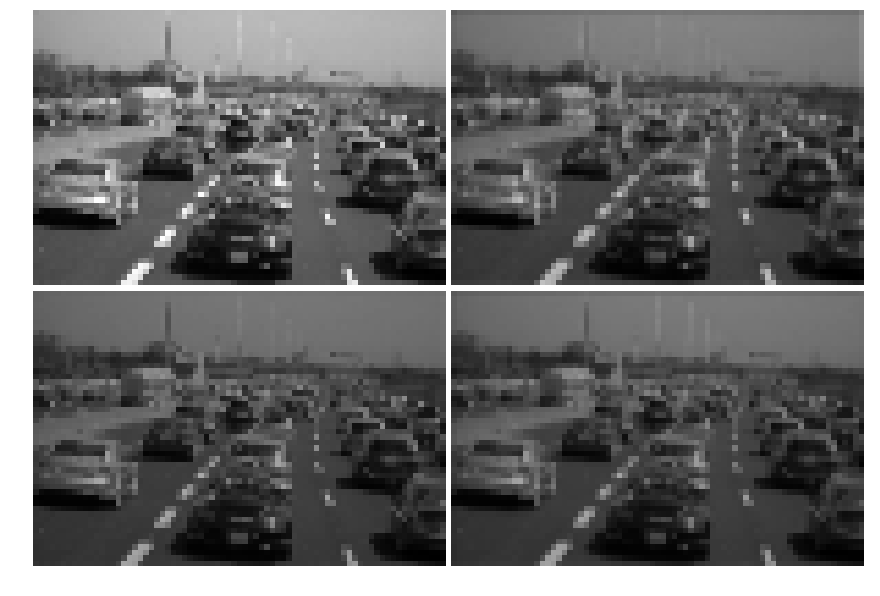

In [71]:
vis_square(fmaps_[:4])

('tensor size \t ', torch.Size([1, 1024, 50, 75]))


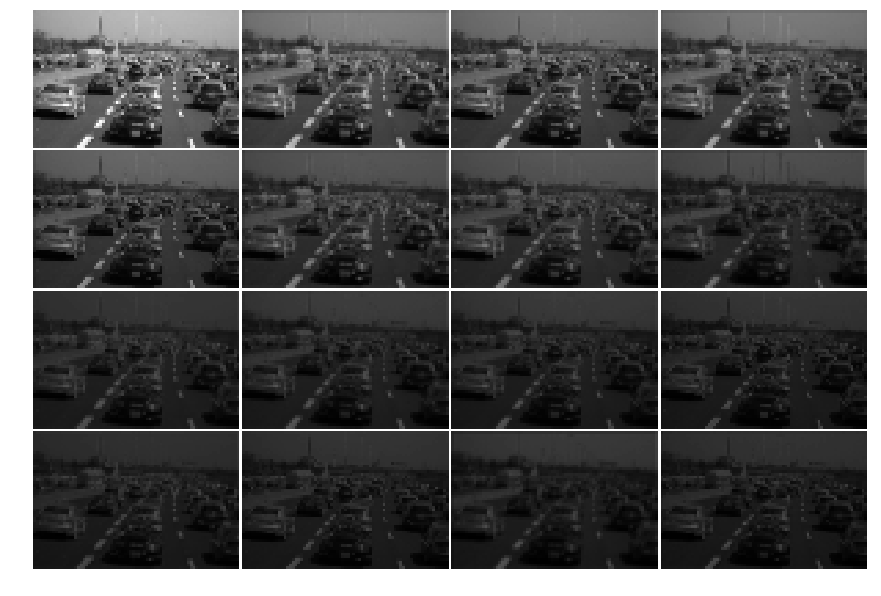

In [68]:
fmaps_ = feature_maps_sort(output3[0])
vis_square(fmaps_[:16])

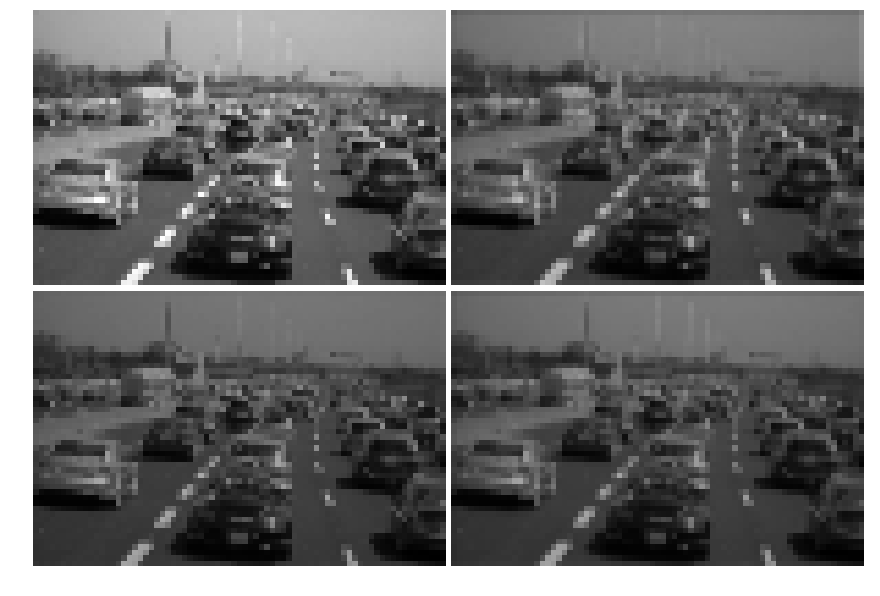

In [69]:
vis_square(fmaps_[:4])

### layer 4 neuron response (stride 32)

/home/jay/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


output shape 	3 	 shape torch.Size([1, 2048, 25, 38])
('tensor size \t ', torch.Size([1, 2048, 25, 38]))


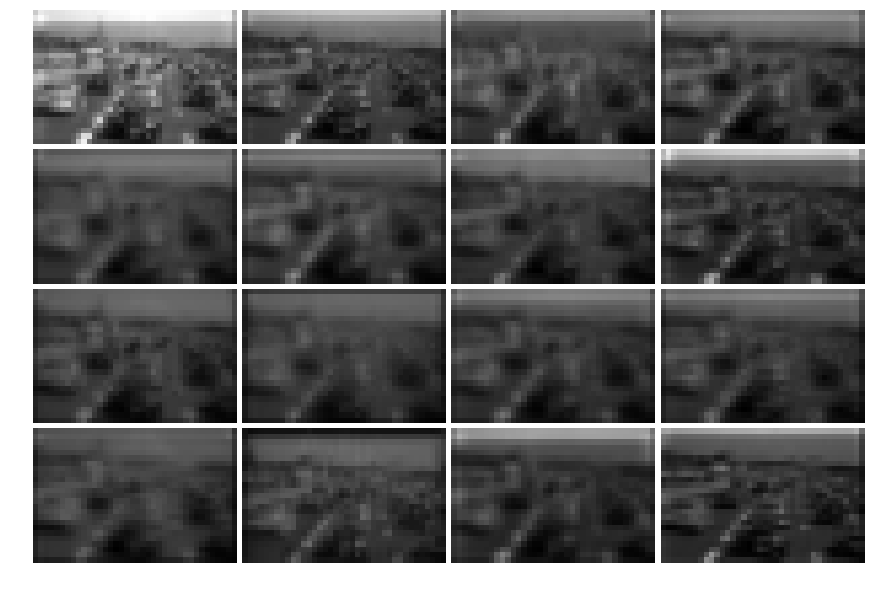

In [72]:
output4 = extract_cnn_feature(model, inputs, 'layer4')
print('output shape \t{} \t shape {}'.format(len(output4), output4[-1].shape) )
fmaps = feature_maps_sort(output4[-1])
vis_square(fmaps[:16])

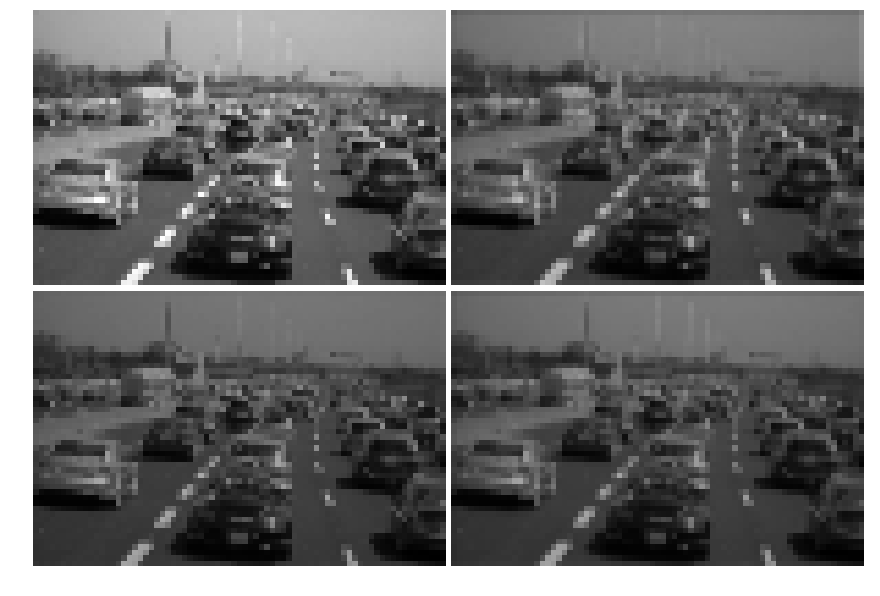

In [73]:
vis_square(fmaps_[:4])

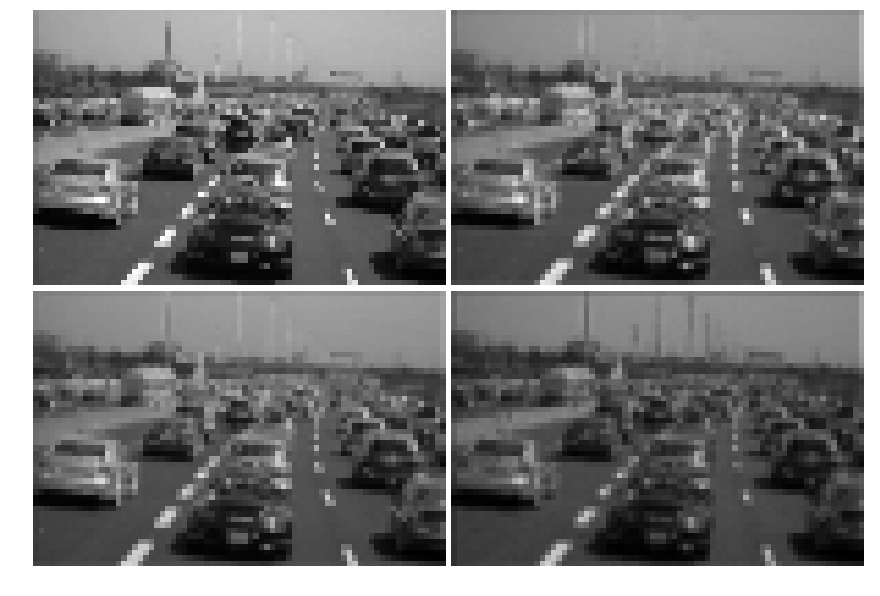

In [74]:
vis_square(fmaps_[4:8])

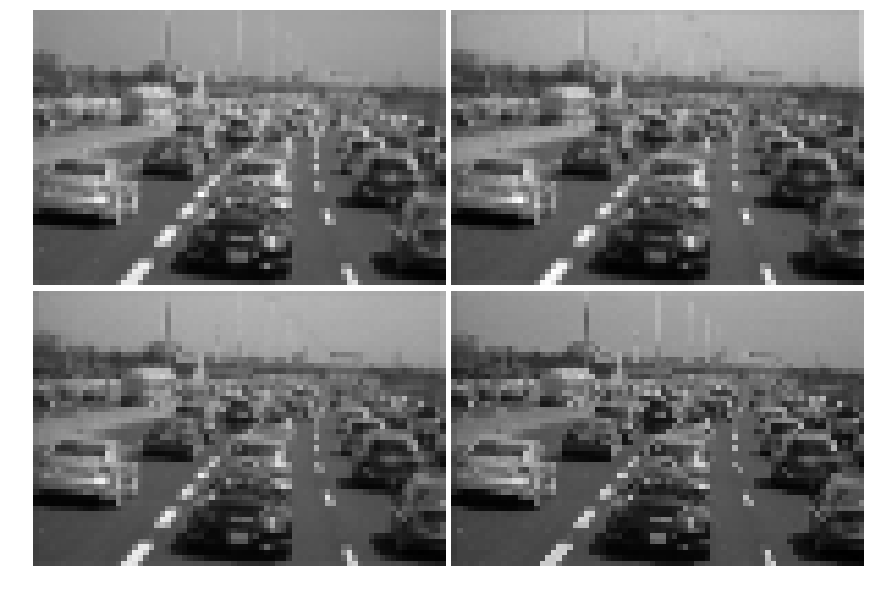

In [75]:
vis_square(fmaps_[8:12])

In [ ]:
## raw image resize view

(800, 1200, 3)


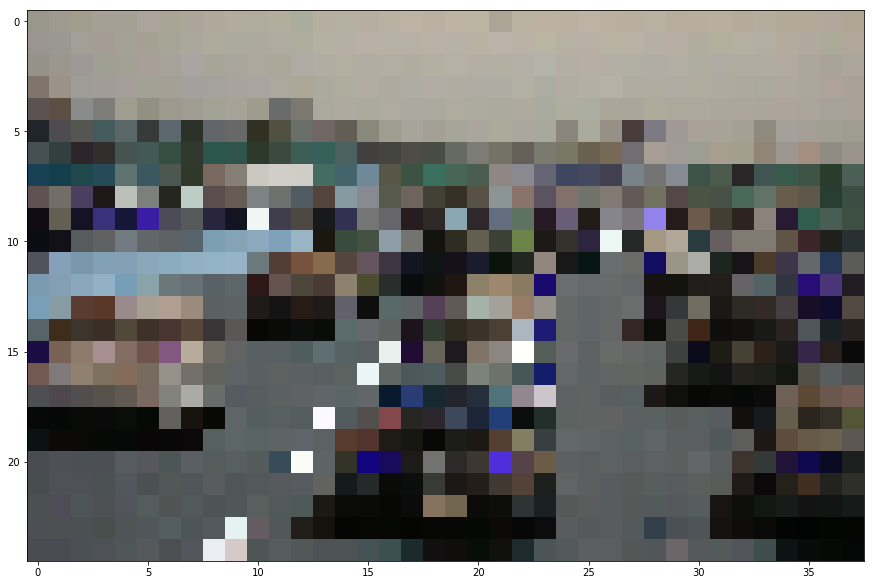

In [87]:
img = cv2.imread('/media/jaden/DeepLearningCode/object_detection/Mask-RCNN/data/images/img5.jpg')
print img.shape
img_s = cv2.resize(img, (38, 25))
plt.imshow(img_s)
plt.show()

(0, (800, 1200, 3))
(1, (400, 600, 3))
(2, (200, 300, 3))
(3, (100, 150, 3))
(4, (50, 75, 3))
(5, (25, 37, 3))


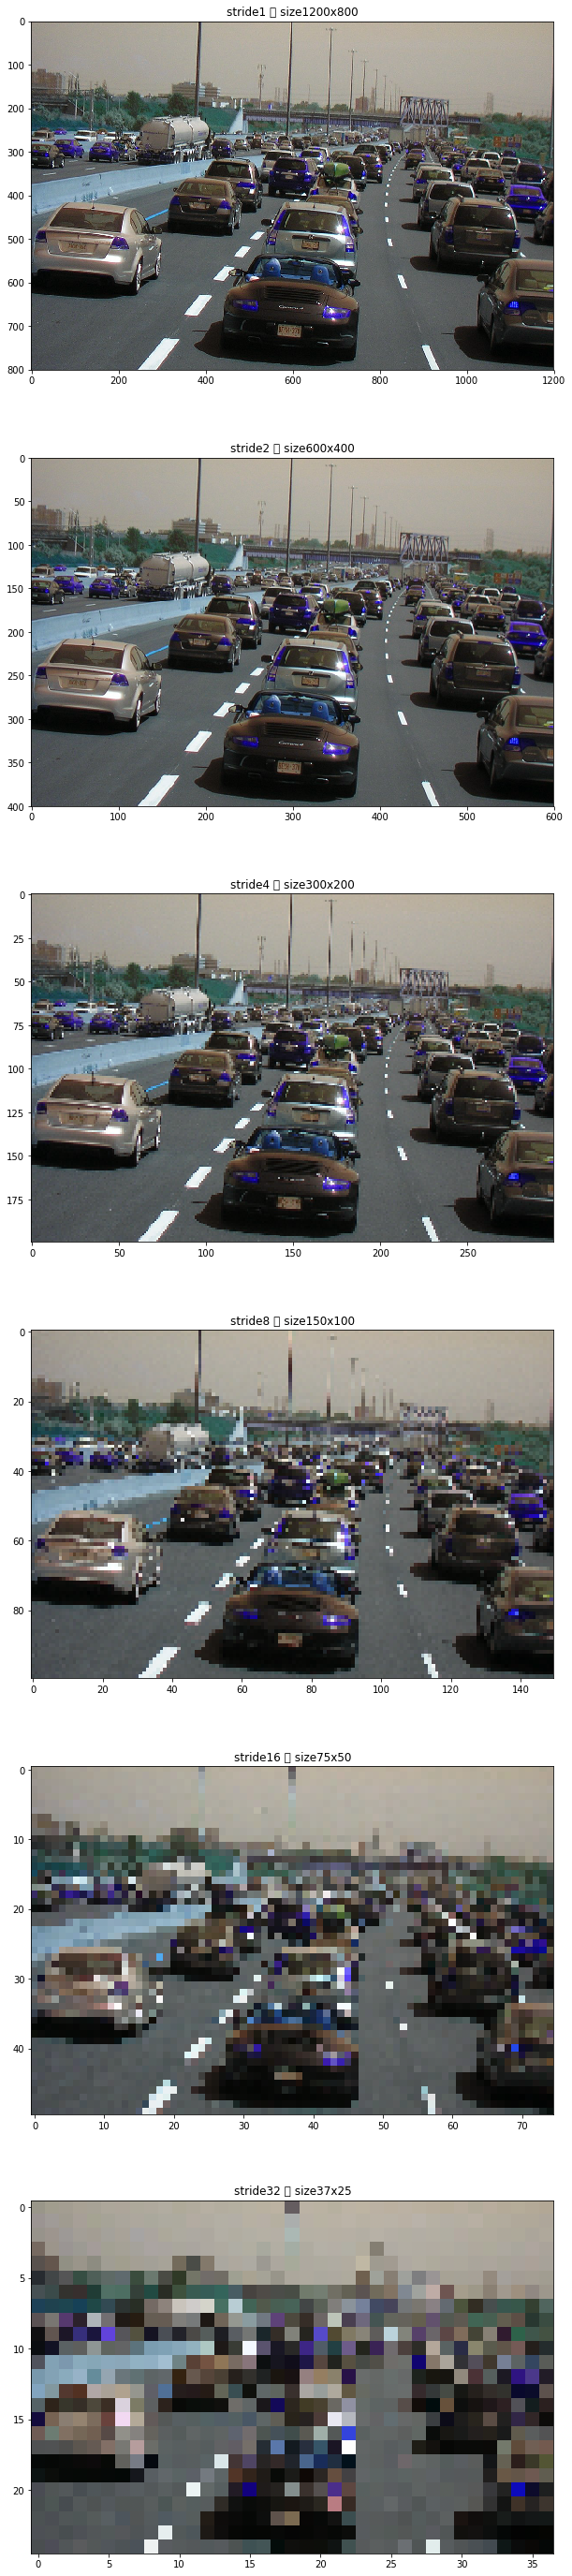

In [105]:
h, w, _ = img.shape
fig, axs = plt.subplots(6, 1,  figsize=(10, 50))
i = 0
for ax in axs:   
    _img = cv2.resize(img, (w/2**i, h/2**i))
    print(i, _img.shape)
    ax.imshow(_img)
    ax.set_title('stride{} \t size{}x{}'.format(2**i, w/2**i, h/2**i))
    i +=1
    
plt.show()
        

In [67]:
### pre-process input

In [ ]:
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [ ]:
t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))

# contiguous

In [30]:
x = torch.randn(5, 4)
print(x.stride(), x.is_contiguous())
print(x.t().stride(), x.t().is_contiguous())
x.view(4, 5) # ok
print torch.logsumexp(x, 1)

((4, 1), True)
((1, 4), False)


AttributeError: 'module' object has no attribute 'logsumexp'

In [124]:
x.t().view(4, 5) # fails

tensor([[ 0.2822,  0.3489, -1.5160,  1.2975, -0.3321],
        [ 1.8867,  1.6301, -0.3279, -0.3137, -0.0401],
        [ 0.6527,  0.2988, -0.1119,  0.4052,  0.9699],
        [ 0.2071, -1.8515, -0.0957, -0.7168,  0.0700]])

In [106]:
print('decice %d' % torch.cuda.current_device())

decice 0


In [100]:
2^5

7

In [101]:
2**3

8